# this project is about clustering 
In thes project we hava The San Francisco Controller's Office maintains a database of the salary and benefits

paid to City employees since fiscal year 2013. the idea is to use the K_mean to solve the problem.

In [2]:
# Let's import all librires that we need for this project


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# import the data
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\Unsupervisor_learning\\Clustering\\employee-compensation.csv")

In [3]:
data

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43836214,98444.94,0.0,0.00,98444.94,20540.24,15275.18,8019.49,43834.91,142279.85
683273,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43966403,9416.71,0.0,0.00,9416.71,1904.43,1468.77,743.51,4116.71,13533.42
683274,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,44016180,96475.00,0.0,576.00,97051.00,20241.56,14100.16,7897.00,42238.72,139289.72
683275,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42423439,115943.00,0.0,0.00,115943.00,24188.37,15275.18,9018.34,48481.89,164424.89


In [4]:
# as we can see, we have 683277 row and 22 column 

In [5]:
data.shape

(683277, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

# Do you need to reduce the number of columns?

In [7]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [8]:
# We need to reduce the number of columns because some columns does not have impact in our analyses like
# Organization Group Code  and others basically is a "duplicate of columns" like for example the total salary is a sum
# of all salaries paid to City employees.So we can use the parcials salaries in our analyses 
# variable like Union, Employee Identifier... is just for get idea about our data and these will not have a big
# impact in our analyses

In [9]:
# check null value 

# Is your data clean?

In [10]:
data.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [11]:
# as we can see Our data is not cleaning , we have null value in Department Code ,Department,Union Code,Union  and job
# visualize the null column.


In [12]:
data[data['Department Code'].isnull()]

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
553552,7,8300,8300,Fiscal,2017,General City Responsibilities,NaN,NaN,790.0,"SEIU, Local 1021, Misc",...,37042591,49630.50,15016.51,4575.73,67844.53,10619.27,12779.88,4796.56,28195.71,96040.24
553553,7,Q000,Q003,Fiscal,2017,General City Responsibilities,NaN,NaN,911.0,POA,...,37069439,116189.62,40990.09,2260.08,159439.79,20076.66,14515.01,2724.05,37315.72,196755.51


In [13]:
# drop the column NaN


In [4]:
data1=data.dropna()

In [5]:
data1

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43836214,98444.94,0.0,0.00,98444.94,20540.24,15275.18,8019.49,43834.91,142279.85
683273,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43966403,9416.71,0.0,0.00,9416.71,1904.43,1468.77,743.51,4116.71,13533.42
683274,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,44016180,96475.00,0.0,576.00,97051.00,20241.56,14100.16,7897.00,42238.72,139289.72
683275,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42423439,115943.00,0.0,0.00,115943.00,24188.37,15275.18,9018.34,48481.89,164424.89


In [16]:
print (data.shape)
print (data1.shape)

(683277, 22)
(682919, 22)


In [17]:
print (683277-682919)

358


In [18]:
# now we have less 358 row


In [19]:
# see the info about my new data
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  682919 non-null  int64  
 1   Job Family Code          682919 non-null  object 
 2   Job Code                 682919 non-null  object 
 3   Year Type                682919 non-null  object 
 4   Year                     682919 non-null  int64  
 5   Organization Group       682919 non-null  object 
 6   Department Code          682919 non-null  object 
 7   Department               682919 non-null  object 
 8   Union Code               682919 non-null  float64
 9   Union                    682919 non-null  object 
 10  Job Family               682919 non-null  object 
 11  Job                      682919 non-null  object 
 12  Employee Identifier      682919 non-null  int64  
 13  Salaries                 682919 non-null  float64
 14  Over

In [20]:
data1.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [21]:
# as we can se, now we do not have a null value 

In [22]:
# see the unique value for each column 
col_name=data1.columns
for i in col_name:
    print('column',i,' has :',data1[i].nunique(),"Unique values")

column Organization Group Code  has : 7 Unique values
column Job Family Code  has : 59 Unique values
column Job Code  has : 1210 Unique values
column Year Type  has : 2 Unique values
column Year  has : 8 Unique values
column Organization Group  has : 7 Unique values
column Department Code  has : 60 Unique values
column Department  has : 109 Unique values
column Union Code  has : 70 Unique values
column Union  has : 129 Unique values
column Job Family  has : 59 Unique values
column Job  has : 1348 Unique values
column Employee Identifier  has : 309658 Unique values
column Salaries  has : 498267 Unique values
column Overtime  has : 261976 Unique values
column Other Salaries  has : 307729 Unique values
column Total Salary  has : 614930 Unique values
column Retirement  has : 451568 Unique values
column Health and Dental  has : 209844 Unique values
column Other Benefits  has : 496051 Unique values
column Total Benefits  has : 616180 Unique values
column Total Compensation  has : 658354 Uniq

In [23]:
data1.Job.unique()

array(['IS Administrator 1', 'IS Administrator 3', 'IS Trainer-Assistant',
       ..., 'Customer Service Rep Trainee', 'Customer Service Rep Spv',
       'Mayoral Staff I'], dtype=object)

In [24]:
data1.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [25]:
# let's create a count plot. and for data i will create a featues variable and eliminate all variable with more than 100 unique 
# value

In [28]:
data1.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

features=['Job Family Code', 'Job Code', 'Year Type',
       'Organization Group', 'Department Code', 'Department',
       'Union', 'Job Family', 'Job']

In [29]:
# convert the categorical data into numerical representation data


row_data=data1[features]
print(row_data.shape)
new_row_data=pd.get_dummies(row_data,columns=features)
print(new_row_data.shape)

# What all parameters do we need to give to our clustering algorithm?

We need parameters which will have impact in our analysis
so for this clustering algorithm, I will choose 4 parameters that are:
#Salaries 'Overtime', 'Other Salaries', 'Retirement','Health and Dental', 'Other Benefits']]

As we can see in the describe problem: Normal salaries paid to permanent or temporary City employee, so we have.
to include it because is important for analysis.
Overtime is the fact, a kind of salary, but I include it in our analyses because we have employees who were temporary.
or not work 40h. those employees are not included in the overtime category.
Other Salaries like the problem describe it mayiclude SC, irregular payments made to City employees, including premium pay,

# drop all variable that we do not need

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  682919 non-null  int64  
 1   Job Family Code          682919 non-null  object 
 2   Job Code                 682919 non-null  object 
 3   Year Type                682919 non-null  object 
 4   Year                     682919 non-null  int64  
 5   Organization Group       682919 non-null  object 
 6   Department Code          682919 non-null  object 
 7   Department               682919 non-null  object 
 8   Union Code               682919 non-null  float64
 9   Union                    682919 non-null  object 
 10  Job Family               682919 non-null  object 
 11  Job                      682919 non-null  object 
 12  Employee Identifier      682919 non-null  int64  
 13  Salaries                 682919 non-null  float64
 14  Over

In [6]:
features_to_drop=['Organization Group Code','Job Family Code','Job Code','Year Type','Organization Group','Department Code',
                  'Department','Union','Job Family','Job',
       'Year','Union Code','Employee Identifier', 'Total Salary', 'Total Benefits',
       'Total Compensation']

In [7]:
final_data=data1.drop(features_to_drop,axis=1)

In [8]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 0 to 683276
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Salaries           682919 non-null  float64
 1   Overtime           682919 non-null  float64
 2   Other Salaries     682919 non-null  float64
 3   Retirement         682919 non-null  float64
 4   Health and Dental  682919 non-null  float64
 5   Other Benefits     682919 non-null  float64
dtypes: float64(6)
memory usage: 36.5 MB


AS we can see, now I have just those variable that I will work with in my data analyses

C:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


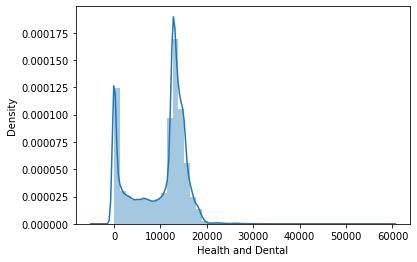

In [34]:
sns.distplot(data1['Health and Dental'])
plt.show()

Skewness is a measure of symmetry, or, more precisely, the lack of symmetry. A distribution, or data set is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

==============================================================

https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,precisely%2C%20the%20lack%20of%20symmetry.&text=Kurtosis%20is%20a%20measure%20of,have%20heavy%20tails%2C%20or%20outliers.

In [35]:
print("Skewness: %f" % data1['Salaries'].skew())
print("Kurtosis: %f" % data1['Salaries'].kurt())


Skewness: 0.575171
Kurtosis: 0.711238


<AxesSubplot:ylabel='count'>

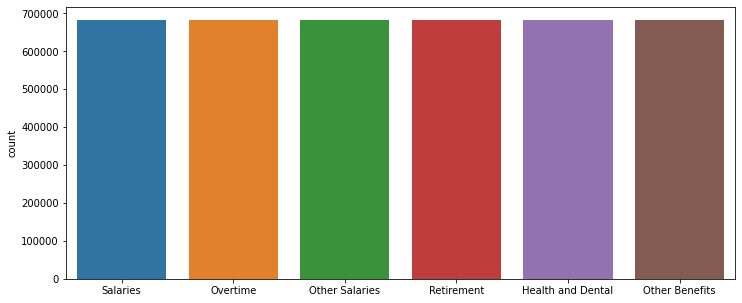

In [36]:
# let's see the range salary , overtime and all others informatiom for those variable that i considered by ploting the bar plot
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=final_data)

In [ ]:
# see the relactinship with may be the predict variable

#=========

g=sns.PairGrid( final_data,
               vars=['Salaries','Overtime','Other Salaries','Retirement','Health and Dental','Other Benefits'],
    
               diag_sharey=False,
               palette=['red','green','blue'])

# adds hist on the diagonal 
g.map_diag(plt.hist)

# adds density plots above the diagonal

g.map_upper(sns.kdeplot)


# adds scatterplots below  the diagonal 

g.map_lower(sns.scatterplot)

# adds legend 
 
g.add_legend()



In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans=KMeans(n_clusters=5)
kmeans

KMeans(n_clusters=5)

# fit the data to a clustering model.

In [12]:
y_predict=kmeans.fit_predict(data1[[ 'Salaries', 'Overtime', 'Other Salaries', 'Retirement',
       'Health and Dental', 'Other Benefits']])

In [156]:
print(kmeans.cluster_centers_)

[[ 13535.36151816    479.19048486   1477.52507742   1927.75771
    2533.33427672   1177.9185872 ]
 [ 65784.39464152   4734.0113933    2960.94593746  13315.69200009
   12135.1059227    5572.72964133]
 [173685.88338076   3600.73197213   7062.74348667  33586.06194183
   14908.24606738  10536.85928454]
 [110561.45583532   4475.74036595   5475.20624446  21804.02715952
   13557.5571203    7570.55765151]
 [115602.6632396   52056.8258633   13545.52861826  24769.4137459
   14939.95176696   5455.60490583]]


In [13]:
y=kmeans.labels_
print(y)

[3 3 3 ... 2 2 2]


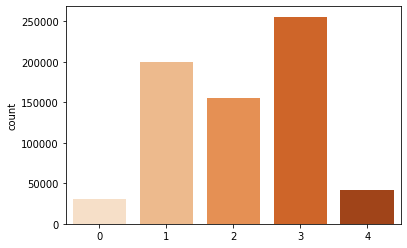

In [14]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

In [158]:
print(y_predict)

[1 1 1 ... 3 3 3]


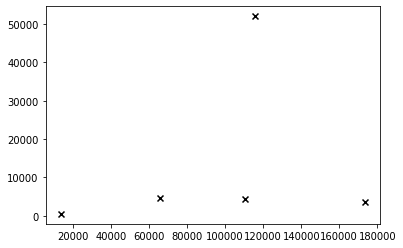

In [15]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

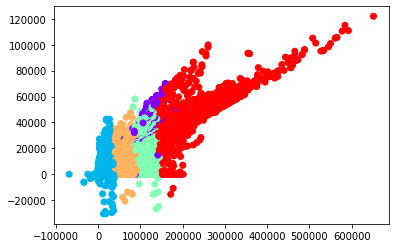

In [16]:
plt.scatter(final_data.iloc[:,0].values,final_data.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
plt.show()

In [ ]:
plt.scatter(final_data.iloc[:,0].values,final_data.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="X", color='k')
plt.show()

# Find the number of clusters for the data.

In [ ]:
# for find the number of clusters i will use the Elbow method 

In [20]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [30]:
K = range(1,10)
X = final_data
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]



In [31]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

MemoryError: Unable to allocate 1.70 TiB for an array with shape (233188838821,) and data type float64

In [ ]:
kIdx = 10-1

In [ ]:
##### plot ###
kIdx = 2
# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()